# DataScience 2000B / Integrated Science 2000B Final 2023


## Your Student ID: ########

## General 
The instruction for the final exam for DS2000B / IS2002B is included in this Jupyter Notebook. 

- You are allowed to use any document and source and look up documents on the internet. You are not allowed to use chatGPT, copilot, or any other AI engine that provides programming assistance. 
- You or not allowed to share documents, or communicate in any other way with people during period of final. Given that there are students with extra time, this is until 6pm.  
- You are only allowed to use the python packages listed under "preliminaries" - the use of other regression (e.g., statsmodels, numpy polyfit) or machine learning toolboxes (e.g., sklearn) is not permitted. 
- All the code you are using from previous assignments or labs needs to be included in the notebook. 
- Most questions also require some written answer. The answer to these questions should be given in full English sentences. 
- All Figures should be appropriately labeled in x and y axis.  
- The Final exam needs to be submitted on OWL (Assignment) before 5:30pm. If you have approved accommodation, you need to submit after 3.5 hrs + your extra time after the start of the exam at 2pm.
- Any final submitted later than the alloted time will be scored with 0 pts.  
- **It is your responsibility that you submit the correct file. Please check that you uploaded the correct file by downloading the submitted version and opening it in jupyter before you leave the exam room.** 

## Problem description 

Companies are increasingly using Machine Learning algorithms and Artificial Intelligence (AI) to select the job applicants that they want to bring in for an interview. Many applications are nowadays not seen by a human at all anymore - the initial screening is done purely by algorithms. 

These algorithms work in quite similar ways to the classification algorithms (logistic regression) that you've learned in class: They are models with many parameters, which have been optimized on a training set of data (using a loss function and gradient). The best algorithm will then be picked by testing its predictive performance on a left-out test set. 

The data the algorithm is trained on a large number of applications from previous job-applicants. It tries to predict whether the job candidate was judged to suitable for the job after the interview. These candidates are shortlisted by the algorithm (shortlist, coded 0: not shortlisted, 1: shortlisted).

The main problem with these algorithms is that they are often biased, simply because the original training data was biased. That is, if more white males were invited to an interview than females of ethnic minorities, then the algorithm learns that a name such as "Alexander" predicts better chances of being suitable for the job than "Aaliyah", even if all the other performance indicators are matched. 

The company that sells the algorithm claims that the algorithm is unbiased. However, you are more critical, and want to test whether this is really true, before recommending to use the algorithm for hiring. 

You decide to conduct an experiment to test the influence of the first name on the decision. 
Because the algorithm detects when it gets the same application twice (and dismisses them), every single application must be slightly different. Since you have taken Data Science 2000 - this is no problem for you! You write a program that generate 1500 applications, each with a random GPA, degree, University, font, formatting.

You then *randomly* assign whether the first name is male or female. You also *randomly choose* whether the first and last name sound White Canadian, or to belong to an ethnic minority (black, first nation, asian, persian). The CVs are then submitted to the algorithm that then gives you a decision of "shortlisted" and "not shortlisted". 

The dataset `recruitment.csv` contains the data with the data frame: 

* age: age of the candidate in years
* undergrad_degree: DataSci, CompSci, or Stats
* gender: Likely gender indicated by first name on application (male / female)
* minority: Whether the name sounds like it belongs to a Canadian of Caucasian descent or not (0: caucasian, 1: non-caucasian)
* shortlist: Whether the candidate was shortlisted by the algorithm (0: not shortlisted, 1: shortlisted)

In [4]:
# Preliminaries - you are only allowed to import the following packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as so

## Task 1: (37pts)
### Questions 1.1: (3pts)
Calculate the probability of being shortlisted by the algorithm with a male and female name. Report the probabilities 

In [5]:
#Calculate the probability of being shortlisted by the algorithm with a male and female name. (3pts)
D = pd.read_csv('recruitment.csv')
D.groupby('gender').shortlist.mean()

gender
female    0.248266
male      0.282413
Name: shortlist, dtype: float64

### Question 1.2: (3pts)
Write a function that takes a data frame as input and then returns the difference in probability of being shortlisted by the algorithm between males and females. 

Call the function with the real data and report the difference in percentage of male and female candidates being shortlisted. 

In [ ]:
# Correct function (2pts) - Note that the difference could be reported the other way around
def calc_gender_diff(D):
    """Calculare the gender difference in the probability of being shortlisted

    Args:
        D (DataFrame): recruitment data
    """
    m = D.shortlist[D.gender=='male'].mean()
    f = D.shortlist[D.gender=='female'].mean()
    return m-f


In [7]:
# Correct report in percentage (1pts)
diff = calc_gender_diff(D)
print('The gender difference in the probability of being shortlisted is {:.2f}%'.format(diff*100))

The gender difference in the probability of being shortlisted is 3.41%


### Question 1.3: (8pts)
In this question, you will determine whether the gender difference found in Q.1.2 is significant.

You want to test the hypothesis that the algorithm takes the (likely) gender of the first name on the application into account when making shortlisting decisions. 

* Formulate the Null-hypothesis
* Conduct a randomization test where you randomly randomly shuffle the column of the dataframe that is exchangeable under the Null hypothesis. 
* Plot a histogram of the difference in probability between male and female candidates. 
* Choose whether you are conducting a one-sided or two-sided test
* Report the p-value for testing the the hypothesis and draw a conclusion

> Null hypothesis: The algorithm's shortlisting decision is not influence by the gender of the first name on the CV (2pts)

In [ ]:
def randomize_column(df,colname):
    """Random"""
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

def randomization_test(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S= randomize_column(D,shuffle)
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided) with rejection region above the threshold
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    elif sides==-1:
        p=sum(listOfTS<=realTS)/len(listOfTS)
    elif sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
    print(' P-value of the randomization test is p= ',p)
    return p

 P-value of the randomization test is p=  0.1508


0.1508

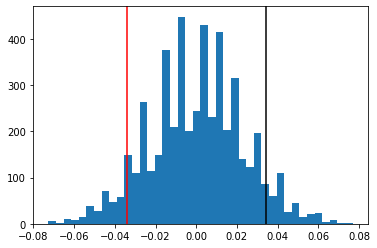

In [ ]:
randomization_test(D,calc_gender_diff,'gender',numIterations=5000,sides=2, nbins = 40) # Using randomization correctly 2 pts - using 2-sided test: 2 pts

> *Conclusion: (2pts)*
Based on the p-value (p=0.1478) we cannot reject the Null-hypothesis that the algorithm is not biased by the name of the candidate.

### Question 1.4 (5pts)
In this question we will test whether the algorithm is biased against women of ethnic minorities. We will do this by comparing the probability of being shortlisted for a application with a female minority name to anybody else. 

Add a new column entitled 'female_minority' that is 1 if the name indicates the the applicant is both female AND a member of a minority, and 0 otherwise. 

Write a function that returns the difference in the probability of getting shortlisted for female members of an ethnic minority against anybody else. 

In [10]:
# Get the coded columns correct: 2 pts
D['female_minority'] = np.logical_and(D.gender=='female',D.minority==1)

In [11]:
# New function and correct answer: 3 pts
def calc_female_minority_diff(D):
    """Calculate the difference in the probability of being shortlisted when name is female + minority

    Args:
        D (DataFrame): recruitment data
    """
    y = D.shortlist[D.female_minority==1].mean()
    n = D.shortlist[D.female_minority==0].mean()
    return y-n

In [12]:
diff = calc_female_minority_diff(D)
print('The difference in the probability of being shortlisted is {:.2f}%'.format(diff*100))

The difference in the probability of being shortlisted is -8.48%


### Question 1.5: (7pts)
In this question you will determine whether the difference observed in Q.1.4 constitute significant discrimination against women of ethics minorities. 

You want to test the hypothesis that the algorithm is *less likely* to shortlist the candidate, if the name on the application suggests that the applicant is both female and a member of a minority.  

* Formulate the Null-hypothesis 
* Conduct a randomization test (with at least 5000 iterations) where you randomly randomly shuffle the column of the dataframe that is exchangeable under the Null hypothesis. 
* Plot a histogram of the difference in probability between male and female candidates. 
* Choose whether you are conducting a one-sided or two-sided test
* Report the p-value for testing the the hypothesis and draw a conclusion

> Null hypothesis: the algorithm is *equally or more likely* to shortlist the application, if the name on the application suggest that the applicant is female and minority. (2pts, 0pts if it does not mention >=)

 P-value of the randomization test is p=  0.0006


0.0006

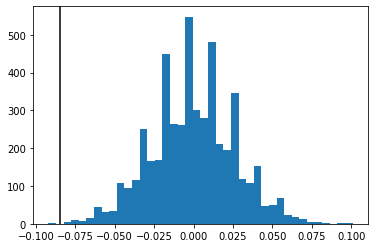

In [13]:
randomization_test(D,calc_female_minority_diff,'female_minority',numIterations=5000,sides=-1, nbins = 40) # 3pts - (1pts for 1-sided + 2pts reading it off the correct side)


> The p-value (p=0.0006) allows us to reject the Null-hypothesis.  (*2 pts for correct conclusion. Can get up to 1pts if drawing correct conclusion on wrong p-value*). 

## Task 2: (25pts)

Instead of just doing a randomization test to test your hypotheses, you decide that you also need to account for possible other differences between the applications. 
Even though you randomly assigned the name to each application, you cannot be sure that they are exactly matched between the groups. 
So you decided to build and test different models of the shortlisting decision of the algorithm. 

## Question 2.1: (4pts) 

Create dummy coded variables for gender (male / female) 
and undergraduate major (DataSci, CompSci, Stats).

You are free to choose on of the variables as comparison group - just be aware that it will influence the your interpretation of the regression coefficients later on. 

Based on your dummy variable, report the proportion of applications that have labels with having a "Data Science" Major. 

In [14]:
# Dummy code gender (1pts)
D['genderI']=np.double(D['gender']=='female')

# Dummy code major (2pts)
D['DataSciI']=np.double(D['undergrad_degree']=='DataSci')
D['CompSciI']=np.double(D['undergrad_degree']=='CompSci')

# Report correct proportion (1pts)
D.DataSciI.mean()

0.34

34% of the applications are listed to have a Data Science degree. 

### Question 2.2: Build regression model (9pts)

Build a regression model to predict the shortlisting decision (1/0) of the algorithm based on the following variables:

* gender (dummy coded)
* undergrad_degree (dummy coded)
* minority
* GPA 


Written answer: From among multiple Regression, median regression, and logistic regression, choose the most appropriate regression technique and justify your choice. 

Estimate and report the parameters of your model. 

Written answer: Interpret the gender, minority, and undergraduate degree effects. Which of the groups does the algorithm have a preference for? 

> *Picking logistic regression and justification: 2pts*
The y-variable is a Bernoulli (binary) variable, therefore the most appropriate regression technique is logistic regression.

In [ ]:
def logisticRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]       # Start out with the intercept
    for i in range(len(xname)):
        yp=yp+D[xname[i]]*b[i+1]        # Add the prediction of each regressor separately
    p = np.exp(yp)/(1+np.exp(yp))
    p = p.clip(1e-12,1-(1e-12))
    return p

def logisticRegLoss(b,D,y,xname):
    p = logisticRegPredict(b,D,xname)
    cost = -y*np.log(p)-(1-y)*np.log(1-p)
    N=len(xname)
    grad=np.zeros(N+1)
    res = y-p
    grad[0]=-sum(res)
    for i in range(N):
        grad[i+1]=-np.sum(D[xname[i]]*res)         # Add each regressor
    return (cost.sum(),grad)

def logisticRegFit(D,y,xname,figure=0,b0=[]):
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros(k)
    RES = so.minimize(logisticRegLoss,b0,args=(D,y,xname),jac=True)
    b = RES.x
    ll = -RES.fun # Negative function value is the log likelihood
    p = logisticRegPredict(b,D,xname)
    if (k==2 & figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        pp=np.exp(yp)/(1+np.exp(yp))
        ax.plot(xp,pp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (ll,b)

In [ ]:
# *Correct functions and use of logistic regression - report of correct (3pts)*
logisticRegFit(D,D.shortlist,['genderI','minority','DataSciI','CompSciI','GPA'])

(-857.0487989043158,
 array([-1.76478355, -0.19834488, -0.33527128,  0.21011037, -0.20019992,
         0.31107727]))

Based on the regression slope for the following variables the algorithm has a preference for: 

* GenderI = -0.19: Preference against females (for males): 1pts
* Minority = -0.33: Preference against non-caucasians (for caucasians): 1pts
* DataSci = 0.21: Preference for Data Science majors over others: 1pts 
* CompSci = -0.20: Preference against CompSci majors over others: 1pts

### Question 2.3: (8pts)
Use Model comparison to determine whether gender has an effect on the probability of being shortlisted, after we account for the variables (minority, undergrad_degree, and GPA). 

Compare the models using 50-fold cross-validation to determine the cross-validated prediction performance the two appropriate model.

Is there positive evidence (in the sense of Kass & Raftery, 1995) for an effect of gender on the algorithms decision? 

In [ ]:
#Correct use of function (2pts)
def KfoldCVlogisticReg(D,y,xname,K=50,fitfcn=logisticRegFit,predictfcn=logisticRegPredict):
    N = len(y) #Number of observations
    yp= np.zeros(N)
    ind = np.arange(N)
    ind = np.floor(ind/N*K)

    # Get overall model fit
    LL,b_all=fitfcn(D,y,xname,figure=0)

    # Loop over the cross-validation folds
    for i in range(K):
        r,b=fitfcn(D[ind!=i],y[ind!=i],xname,b0=b_all,figure=0)
        yp[ind==i]=predictfcn(b,D[ind==i],xname)
    LLcv = sum(y*np.log(yp)+(1-y)*np.log(1-yp))
    return LLcv,LL

In [ ]:
# Choice of correct terms for both models (2pts)
LLcv1,LL1 = KfoldCVlogisticReg(D,D.shortlist,['genderI','minority','DataSciI','CompSciI','GPA'])
LLcv0,LL0 = KfoldCVlogisticReg(D,D.shortlist,['minority','DataSciI','CompSciI','GPA'])

# Correct Bayes factor (2pts)
print(f'The Bayes factor in favor of the model including gender is:{np.exp(LLcv1-LLcv0)}')

The Bayes factor in favor of the model including gender is:1.3060013957386516


> *Correct conclusion: (2pts)*

> While the model including gender has better predictive performance of the algorithms decision, in a bayesian sense, there is no positive evidence for the influence of gender on the decision. 

### Question 2.4 (4pts)
Now use the same approach as in Question 2.3 to test whether being a female AND a member of minority has an influence of the algorithms decision, after we  account for the influence of GPA and undergraduate degree. 

In [19]:
# Choosing the correct model to compare: 2pts
LLcv0,LL0 = KfoldCVlogisticReg(D,D.shortlist,['DataSciI','CompSciI','GPA'])
LLcv2,LL2 = KfoldCVlogisticReg(D,D.shortlist,['female_minority','DataSciI','CompSciI','GPA'])
print(f'The Bayes factor in favor of the model including gender is:{np.exp(LLcv2-LLcv0)}')

The Bayes factor in favor of the model including gender is:77.6986652995251


> *correct Bayes factor (1pt) and correct conclusion (1pt)*
According to Kaas and Raftery (1995) there is strong evidence that the algorithm is less likely to shortlist women of minorities, even if we account for GPA and the undergraduate degree.  

## Task 3: Regularized logistic regression (19pts)
Because there are so many potential variables that could influence the algorithm's decision, you want to implement a L2-regularized version of logistic regression. 
Having taken Data Science 2000, you decide to do it the hard (and heroic) way, and write the code yourself. That way you can be sure your really know what is going on!

### Question 3.1  (3pts)

Z-standarize the variables GPA, age, gender (dummy coded), minority (dummy coded). 

Check that the variables have after standardization (approximately) a mean of 0 and a standard deviation of 1 by reporting the mean and standard deviations of one of the variables. 

In [20]:
# Z-standardize the data: correct function (1pts)
def zstandardize(d):
    d = (d-d.mean())/d.std()
    return d

# Correct use of function (1pts)
D['ageZ'] = zstandardize(D.age)
D['GPAZ'] = zstandardize(D.GPA)
D['genderZ'] = zstandardize(D.genderI)
D['minorityZ'] = zstandardize(D.minority)

# Correct check 1pt
print('Mean:',D.ageZ.mean())
print('Std:',D.ageZ.std())


Mean: 1.675696618500903e-16
Std: 1.0


### Question 3.2 (7pts)
Change the loss function for logistic regression (i.e. see Assignment 11 solutions) to include L2-regularization.

Regularize all regression coefficients except the intercept with a regularization coefficient of alpha = 0.1. 
Adjust the gradients accordingly.

Calculate the loss and gradients for the regularized logistic regression model, using the variables: 

* Intercept 
* age (z-standardized)
* GPA (z-standardized)
* gender (dummy coded and z-standardized)
* minority (dummy coded and z-standardized)


Report the loss and gradient for the regularized model (alpha = 0.1) and compare it to the loss for the unregularized model for the parameters 
`b= [-0.5,0.2,0.3,-0.2,-0.2]`
(these are the regression coefficients for [intercept, ageZ, GPAZ, genderZ, minorityZ])

Written answer: 
   * Why does the regularized model have a higher loss than the non-regularized model?
   * Which direction do you have to change the regression coefficient for the intercept to lower the loss? 


In [41]:
# Correct addition to loss (1pts), correct addition to gradient (2pts)
def logisticL2Loss(b,D,y,xname,alpha):
    p = logisticRegPredict(b,D,xname)
    cost = np.sum(-y*np.log(p)-(1-y)*np.log(1-p)) + alpha*np.sum(b[1:]**2)
    N=len(xname)
    grad=np.zeros(N+1)
    res = y-p
    grad[0]=-sum(res)
    for i in range(N):
        grad[i+1]=-np.sum(D[xname[i]]*res) + 2*alpha*b[i+1]       # Add each regressor
    return (cost,grad)

In [47]:
# Correct results of regularized function (1pts)
b=np.array([-0.5,0.2,0.3,-0.2,-0.2])
logisticL2Loss(b,D,D.shortlist,['ageZ','GPAZ','genderZ','minorityZ'],alpha=0.1)

(900.4443271446819,
 array([175.48493717, -31.69427383,  61.37045306, -41.00517858,
        -18.84360863]))

In [50]:
# Correct comparison (1pts)
b=np.array([-0.5,0.2,0.3,-0.2,-0.2])
logisticRegLoss(b,D,D.shortlist,['ageZ','GPAZ','genderZ','minorityZ'])

(900.4233271446819,
 array([175.48493717, -31.73427383,  61.31045306, -40.96517858,
        -18.80360863]))

> The loss for the regularized model is larger, as it is the normal logistic regression loss PLUS the sum of squared regression coefficients. The latter term is always positive.  (1pts)

> The derivative of the loss in respect to the intercept is positive - so we need to lower the intercept to minimize the loss. (1pt)

### Question 3.3 (9pts)
Change the logisticRegFit from Assignment 10/11 to use regularization. 
Fit the the model from question Q3.2 (age, GPA, gender, minority), using L2 regularization with alpha = 0.1. 

The function should return the log-likelihood of the data given the model (*Hint: In this case this is not anymore equal to the negative loss!*) 

Compare the logliklihood and the parameters to the fit of the unregularized model.

Written answer: What can you conclude from the comparison of the log-likelihood? Can you determine which model is better?

Written answer: What is the difference between the regression coefficients of the regularized and unregularized model? How can you explain this difference?

In [51]:
# correct loss function (1pts) and correct likelihood returned (2pts)
def logisticL2Fit(D,y,xname,figure=0,b0=[],alpha=2.0):
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros(k)
    RES = so.minimize(logisticL2Loss,b0,args=(D,y,xname,alpha),jac=True)
    b = RES.x
    ll,_= logisticRegLoss(b,D,y,xname) # log likelihood
    ll= -ll # Negative of negative log likelihood is the log likelihood
    return (ll,b)

In [54]:
# Correct results for regularized version (1pts)
ll,b=logisticL2Fit(D,D.shortlist,['ageZ','GPAZ','genderZ','minorityZ'],alpha=0.1)
print(f'Log-likelihood:{ll:.4f}')
print(b)

Log-likelihood:-844.5831
[-1.0549234   0.34403319  0.14524632 -0.10133384 -0.17202798]


In [55]:
# Correct results for non-regularized version (1pts)
ll,b=logisticRegFit(D,D.shortlist,['ageZ','GPAZ','genderZ','minorityZ'])
print(f'Log-likelihood:{ll:.4f}')
print(b)

Log-likelihood:-844.5831
[-1.05498408  0.34429864  0.14535801 -0.10141789 -0.17216197]


> The log-likelihood of the regularized model is lower than the non-regularized model. This is natural, as the regularized model was trained to minimize a loss that included a regularization term, not just the log-likelihood. To compare the models we need to employ cross-validation to get a predictive performance estimate. (2pts)

> The regression coefficients are smaller in the regularized model. This is because the regularized model was trained to minimize the loss function, which includes a regularization term. The regularization term penalizes large regression coefficients. (2pts)

**Congrats: This is the end! You are done with the Final and Data Science 2000. This was a challenging course, and if you finished the final decently, you can be proud of yourself!**